# Chaper 12: Tabular Q-Learning in the Coin Game



***
*“Reinforcement learning is the idea of being able to assign credit or blame to all the actions you took along the way while you were getting that reward signal.”*

-- Jeff Dean, Chief Scientist at Google
***




Reinforcement learning is the idea of being able to assign credit or blame to all the actions you took along the way while you were getting that reward signal. Jeff Dean, Chief Scientist at Google

This chapter introduces you to the basics of reinforcement learning. You'll use one type of reinforcement learning, namely tabular Q-learning, to solve the coin game. Along the way, you'll learn the concepts of dynamic programming and the Bellman equation, and on how to implement tabular Q-learning.

Machine learning can be classified into three areas: Supervised learning, unsupervised learning, and reinforcement learning. The deep learning method we covered in the last few chapters belongs to supervised learning. Generally, supervised learning models learn from examples of input-output pairs. In the process, the model extracts features from the input data (dog and cat pictures, for example) and associate them with the output labels (this image is a dog and that one is a cat). In contrast, in unsupervised learning, the model doesn't have access to pre-assigned target variables (labels) in the training data. Instead, unsupervised learning models use naturally-occurring patterns in the data. Methods used in unsupervised learning include clustering, principal component analysis, and data visualization. 

The third type of machine leanring, reinforcement learning (RL), uses trials and errors to achieve optimal outcomes. Typically, an agent operates in an environment and selects different actions. The environment provides feedback in the form of rewards and punishments. The agent learns to select actions leading to high rewards to maximize cumulated payoffs. This chapter covers one type of RL, tabular Q-learning. Later in the book, you'll learn other types of RL such as the policy gradient method.

In this chapter, you’ll use the Coin game as an example to learn how RL works. Your’ll learn to train a Q-table by trial and error: the agent plays the coin game many times and adjusts the values in the Q-table based on the rewards: increase the Q-value if an action leads to positive rewards and decrease the Q-value otherwise. Once the Q-table is trained, you’ll use it to play and win the coin game. You'll win 100% of the time when you move second, even when playing against the perfect rule-based AI that we developed in Chapter 1.

# 1. What Is Reinforcement Learning?


# 2. Use Q Values to Play the Coin Game

## 2.1. The Logic Behind Q Learning


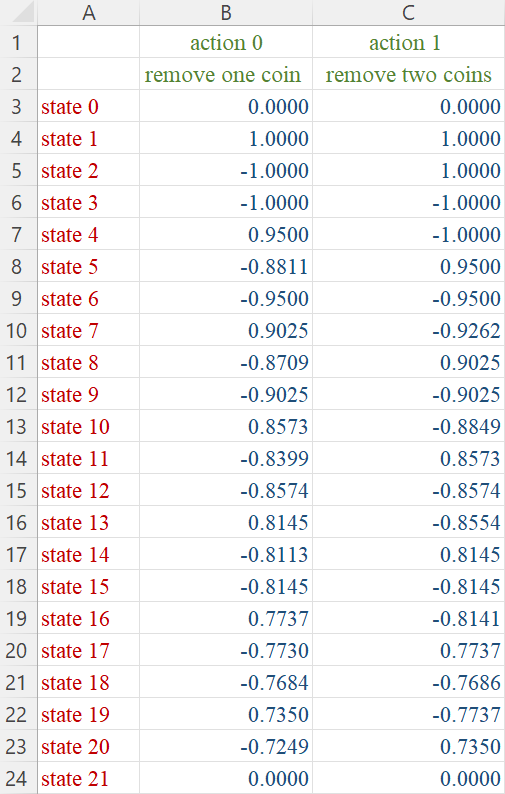

## 2.2. A Python Program to Win the Coin Game

 

In [1]:
import random

def AI(state):
    if state%3 != 0:
        move = state%3
    else:
        move = random.choice([1,2])
    return move

In [2]:
from utils.coin_env import coin_game
import numpy as np
import time

# initiate the game environment
env=coin_game()
# create a Q-table by using values from the CSV file
file="files/coin_Qs.csv"
Q=np.loadtxt(file, delimiter=",")

# play a full game
state=env.reset()
# turn on the graphical rendering
env.render()
while True:
    # Rule-based AI moves first
    m1=AI(state)
    print(f"state is {state}; Player 1 chooses action {m1}")
    state, reward, done, _ = env.step(m1)
    env.render()
    time.sleep(1)
    if done==True:
        print('Player 1 won!')
        break          
    # pick the action with the higher Q value
    m2=np.argmax(Q[state, :])+1
    print(f"state is {state}; Player 2 chooses action {m2}")
    state, reward, done, _ = env.step(m2)
    env.render()
    time.sleep(1)
    if done==True:
        print('Player 2 won!')
        break  
time.sleep(5)
env.close()

state is 21; Player 1 chooses action 1
state is 20; Player 2 chooses action 2
state is 18; Player 1 chooses action 2
state is 16; Player 2 chooses action 1
state is 15; Player 1 chooses action 1
state is 14; Player 2 chooses action 2
state is 12; Player 1 chooses action 1
state is 11; Player 2 chooses action 2
state is 9; Player 1 chooses action 2
state is 7; Player 2 chooses action 1
state is 6; Player 1 chooses action 2
state is 4; Player 2 chooses action 1
state is 3; Player 1 chooses action 1
state is 2; Player 2 chooses action 2
Player 2 won!


# 3. Training the Q-Values


## 3.1. What Is Q-Learning?


## 3.2. Let the Learning Begin


In [3]:
# the learning rate
lr=0.01
# discount rate
gamma=0.95
# parameters to control exploration
max_exp=0.9
min_exp=0.1
# maximum steps in a game
max_steps=50
# number of episodes to train Q-values
max_episode=10000

# Set Q-values to zeros at first 
Q=np.zeros((22, 2))
# Train the Q-table
for episode in range(max_episode):
    # The initial state is the starting position (state 0)
    state=env.reset() 
    # AI moves first
    AIaction=AI(state)
    state, reward, done, _ = env.step(AIaction)
    # The cutoff value for exploration
    cutoff=min_exp+(max_exp-min_exp)*episode/max_episode
    # Play a game
    for _ in range(max_steps):
        # Exploitation
        if np.random.uniform(0,1,1)>cutoff:
            action=np.argmax(Q[state, :])
        # Exploration
        else:
            action=random.choice(range(2))
        # Use the selected action to make the move
        # Important: convert 0 and 1 to 1 and 2
        new_state,reward,done,_=env.step(action+1)
        # Update Q values
        if done==True:
            # Q-agent moves second, -1 means winning
            reward=-reward
            Q[state,action]=reward
            break    
        else:
            # AI payer's turn
            AIaction=AI(new_state)
            new_state,reward,done,_=env.step(AIaction)
            # Q-agent moves second, -1 means winning
            reward=-reward               
            if done:
                Q[state,action]=reward
                break            
            else:
                Q[state,action]=lr*(reward+gamma*np.max(\
                    Q[new_state,:]))+(1-lr)*Q[state,action]
                state=new_state 

# Print out and save the trained Q-table
Q=np.round(Q,4)
print(Q)
np.savetxt("files/coin_Qs.csv",Q,delimiter=',')

[[ 0.      0.    ]
 [ 1.      1.    ]
 [-1.      1.    ]
 [-1.     -1.    ]
 [ 0.95   -1.    ]
 [-0.8804  0.95  ]
 [-0.95   -0.95  ]
 [ 0.9025 -0.921 ]
 [-0.8678  0.9025]
 [-0.9025 -0.9025]
 [ 0.8573 -0.8945]
 [-0.8368  0.8573]
 [-0.8574 -0.8574]
 [ 0.8144 -0.8541]
 [-0.8104  0.8144]
 [-0.8145 -0.8145]
 [ 0.7737 -0.8142]
 [-0.7728  0.7737]
 [-0.77   -0.7701]
 [ 0.735  -0.7737]
 [-0.7278  0.735 ]
 [ 0.      0.    ]]


## 3.3. Test the Trained Q-Table


In [4]:
# test trained Q
for t in range(10):
    print(f"game {t+1}")
    # The initial state is the starting position (state 0)
    state=env.reset() 
    # AI move first
    AIaction=AI(state)
    state, reward, done, _ = env.step(AIaction)    
    # Play a full game
    for _ in range(max_steps):
        action=np.argmax(Q[state, :])
        # Use the selected action to make the move
        new_state,reward,done,_=env.step(action+1)
        if done==True:
            print("Player 2 wins the game!")
            break    
        else:
            AIaction=AI(new_state)
            new_state, reward, done, _ = env.step(AIaction)            
            if done:
                print("Player 1 wins the game!")
                break            
            else:
                state=new_state 

game 1
Player 2 wins the game!
game 2
Player 2 wins the game!
game 3
Player 2 wins the game!
game 4
Player 2 wins the game!
game 5
Player 2 wins the game!
game 6
Player 2 wins the game!
game 7
Player 2 wins the game!
game 8
Player 2 wins the game!
game 9
Player 2 wins the game!
game 10
Player 2 wins the game!
